# Apply convolutional neural network to MNIST hand-written digits dataset

In [11]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [5]:
# Copyright 2015 Google Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Simple, end-to-end, LeNet-5-like convolutional MNIST model example.

This should achieve a test error of 0.7%. Please keep this model as simple and
linear as possible, it is meant as a tutorial for simple convolutional models.
Run with --self_test on the command line to execute a short self-test.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import sys
import time

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'
WORK_DIRECTORY = 'data'
IMAGE_SIZE = 28
NUM_CHANNELS = 1
PIXEL_DEPTH = 255
NUM_LABELS = 10
VALIDATION_SIZE = 5000  # Size of the validation set.
SEED = 66478  # Set to None for random seed.
BATCH_SIZE = 64
NUM_EPOCHS = 10
EVAL_BATCH_SIZE = 64
EVAL_FREQUENCY = 100  # Number of steps between evaluations.


tf.app.flags.DEFINE_boolean("self_test", False, "True if running a self test.")
FLAGS = tf.app.flags.FLAGS

ArgumentError: argument --self_test: conflicting option string: --self_test

In [47]:
def maybe_download(filename):
  """Download the data from Yann's website, unless it's already here."""
  if not tf.gfile.Exists(WORK_DIRECTORY):
    tf.gfile.MakeDirs(WORK_DIRECTORY)
  filepath = os.path.join(WORK_DIRECTORY, filename)
  if not tf.gfile.Exists(filepath):
    filepath, _ = urllib.request.urlretrieve(SOURCE_URL + filename, filepath)
    with tf.gfile.GFile(filepath) as f:
      size = f.Size()
    print('Successfully downloaded', filename, size, 'bytes.')
  return filepath


def extract_data(filename, num_images):
  """Extract the images into a 4D tensor [image index, y, x, channels].

  Values are rescaled from [0, 255] down to [-0.5, 0.5].
  """
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(16)
    buf = bytestream.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
    data = numpy.frombuffer(buf, dtype=numpy.uint8).astype(numpy.float32)
    data = (data - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH
    data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, 1)
    return data


def extract_labels(filename, num_images):
  """Extract the labels into a vector of int64 label IDs."""
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(8)
    buf = bytestream.read(1 * num_images)
    labels = numpy.frombuffer(buf, dtype=numpy.uint8).astype(numpy.int64)
  return labels


def fake_data(num_images):
  """Generate a fake dataset that matches the dimensions of MNIST."""
  data = numpy.ndarray(
      shape=(num_images, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS),
      dtype=numpy.float32)
  labels = numpy.zeros(shape=(num_images,), dtype=numpy.int64)
  for image in xrange(num_images):
    label = image % 2
    data[image, :, :, 0] = label - 0.5
    labels[image] = label
  return data, labels


def error_rate(predictions, labels):
  """Return the error rate based on dense predictions and sparse labels."""
  return 100.0 - (
      100.0 *
      numpy.sum(numpy.argmax(predictions, 1) == labels) /
      predictions.shape[0])

def load_test_data():
    print('Running self-test.')
    train_data, train_labels = fake_data(256)
    validation_data, validation_labels = fake_data(EVAL_BATCH_SIZE)
    test_data, test_labels = fake_data(EVAL_BATCH_SIZE)
    return {
        'X_train': train_data,
        'y_train': train_labels,
        'X_test': test_data,
        'y_test': test_labels,
        'X_val': validation_data,
        'y_val': validation_labels,
    }
    
def load_data():
    # Get the data.
    train_data_filename = maybe_download('train-images-idx3-ubyte.gz')
    train_labels_filename = maybe_download('train-labels-idx1-ubyte.gz')
    test_data_filename = maybe_download('t10k-images-idx3-ubyte.gz')
    test_labels_filename = maybe_download('t10k-labels-idx1-ubyte.gz')

    # Extract it into numpy arrays.
    train_data = extract_data(train_data_filename, 60000)
    train_labels = extract_labels(train_labels_filename, 60000)
    test_data = extract_data(test_data_filename, 10000)
    test_labels = extract_labels(test_labels_filename, 10000)
    # Generate a validation set.
    validation_data = train_data[:VALIDATION_SIZE, ...]
    validation_labels = train_labels[:VALIDATION_SIZE]
    train_data = train_data[VALIDATION_SIZE:, ...]
    train_labels = train_labels[VALIDATION_SIZE:]
    data = {
        'X_train': train_data,
        'y_train': train_labels,
        'X_test': test_data,
        'y_test': test_labels,
        'X_val': validation_data,
        'y_val': validation_labels,
    }
    for k, v in sorted(data.items()):
        print('%s: ' % k, v.shape)
    return data


In [ ]:
data = load_data()

# load data and visualization

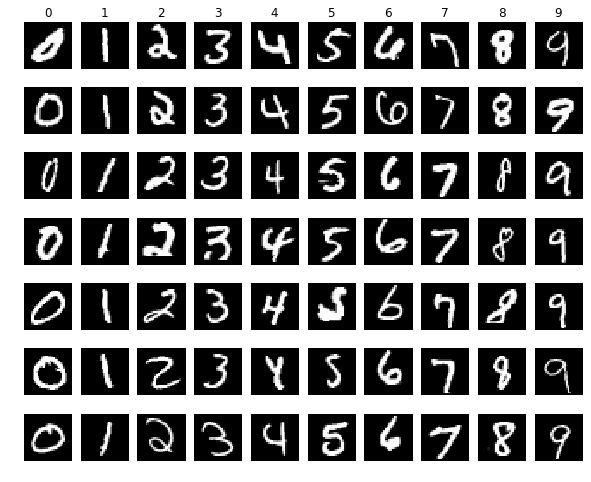

In [56]:
num_epochs = 1
num_epochs = NUM_EPOCHS

train_data = data['X_train']
train_labels = data['y_train']
validation_data = data['X_val']
validation_labels = data['y_val']
test_data = data['X_test']
test_labels = data['y_test']
train_size = train_labels.shape[0]

classes = set(train_labels)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(data['y_train'] == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(data['X_train'][idx].reshape((28, 28)))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# initialization and the model forward pass

In [60]:
# This is where training samples and labels are fed to the graph.
# These placeholder nodes will be fed a batch of training data at each
# training step using the {feed_dict} argument to the Run() call below.
train_data_node = tf.placeholder(
    tf.float32,
    shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))
train_labels_node = tf.placeholder(tf.int64, shape=(BATCH_SIZE,))
eval_data_node = tf.placeholder(
    tf.float32,
    shape=(EVAL_BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))

# The variables below hold all the trainable weights. They are passed an
# initial value which will be assigned when we call:
# {tf.initialize_all_variables().run()}
conv1_weights = tf.Variable(
    tf.truncated_normal([5, 5, NUM_CHANNELS, 32],  # 5x5 filter, depth 32.
                        stddev=0.1,
                        seed=SEED))
conv1_biases = tf.Variable(tf.zeros([32]))
conv2_weights = tf.Variable(
    tf.truncated_normal([5, 5, 32, 64],
                        stddev=0.1,
                        seed=SEED))
conv2_biases = tf.Variable(tf.constant(0.1, shape=[64]))
fc1_weights = tf.Variable(  # fully connected, depth 512.
    tf.truncated_normal(
        [IMAGE_SIZE // 4 * IMAGE_SIZE // 4 * 64, 512],
        stddev=0.1,
        seed=SEED))
fc1_biases = tf.Variable(tf.constant(0.1, shape=[512]))
fc2_weights = tf.Variable(
    tf.truncated_normal([512, NUM_LABELS],
                        stddev=0.1,
                        seed=SEED))
fc2_biases = tf.Variable(tf.constant(0.1, shape=[NUM_LABELS]))

# We will replicate the model structure for the training subgraph, as well
# as the evaluation subgraphs, while sharing the trainable parameters.
def model(data, train=False):
    """The Model definition."""
    # 2D convolution, with 'SAME' padding (i.e. the output feature map has
    # the same size as the input). Note that {strides} is a 4D array whose
    # shape matches the data layout: [image index, y, x, depth].
    conv = tf.nn.conv2d(data,
                        conv1_weights,
                        strides=[1, 1, 1, 1],
                        padding='SAME')
    # Bias and rectified linear non-linearity.
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv1_biases))
    # Max pooling. The kernel size spec {ksize} also follows the layout of
    # the data. Here we have a pooling window of 2, and a stride of 2.
    pool = tf.nn.max_pool(relu,
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')
    conv = tf.nn.conv2d(pool,
                        conv2_weights,
                        strides=[1, 1, 1, 1],
                        padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, conv2_biases))
    pool = tf.nn.max_pool(relu,
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')
    # Reshape the feature map cuboid into a 2D matrix to feed it to the
    # fully connected layers.
    pool_shape = pool.get_shape().as_list()
    reshape = tf.reshape(
        pool,
        [pool_shape[0], pool_shape[1] * pool_shape[2] * pool_shape[3]])
    # Fully connected layer. Note that the '+' operation automatically
    # broadcasts the biases.
    hidden = tf.nn.relu(tf.matmul(reshape, fc1_weights) + fc1_biases)
    # Add a 50% dropout during training only. Dropout also scales
    # activations such that no rescaling is needed at evaluation time.
    if train:
        hidden = tf.nn.dropout(hidden, 0.5, seed=SEED)
    return tf.matmul(hidden, fc2_weights) + fc2_biases

# Build the computation graph

In [61]:
# Training computation: logits + cross-entropy loss.
logits = model(train_data_node, True)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits, train_labels_node))

# L2 regularization for the fully connected parameters.
regularizers = (tf.nn.l2_loss(fc1_weights) + tf.nn.l2_loss(fc1_biases) +
                tf.nn.l2_loss(fc2_weights) + tf.nn.l2_loss(fc2_biases))
# Add the regularization term to the loss.
loss += 5e-4 * regularizers

# Optimizer: set up a variable that's incremented once per batch and
# controls the learning rate decay.
batch = tf.Variable(0)
# Decay once per epoch, using an exponential schedule starting at 0.01.
learning_rate = tf.train.exponential_decay(
    0.01,                # Base learning rate.
    batch * BATCH_SIZE,  # Current index into the dataset.
    train_size,          # Decay step.
    0.95,                # Decay rate.
    staircase=True)
# Use simple momentum for the optimization.
optimizer = tf.train.MomentumOptimizer(learning_rate,
                                       0.9).minimize(loss,
                                                     global_step=batch)

# Predictions for the current training minibatch.
train_prediction = tf.nn.softmax(logits)

# Predictions for the test and validation, which we'll compute less often.
eval_prediction = tf.nn.softmax(model(eval_data_node))

# Small utility function to evaluate a dataset by feeding batches of data to
# {eval_data} and pulling the results from {eval_predictions}.
# Saves memory and enables this to run on smaller GPUs.
def eval_in_batches(data, sess):
    """Get all predictions for a dataset by running it in small batches."""
    size = data.shape[0]
    if size < EVAL_BATCH_SIZE:
        raise ValueError(
            "batch size for evals larger than dataset: %d" %
            size)
    predictions = numpy.ndarray(
        shape=(
            size,
            NUM_LABELS),
        dtype=numpy.float32)
    for begin in xrange(0, size, EVAL_BATCH_SIZE):
        end = begin + EVAL_BATCH_SIZE
        if end <= size:
            predictions[begin:end, :] = sess.run(
                eval_prediction,
                feed_dict={eval_data_node: data[begin:end, ...]})
        else:
            batch_predictions = sess.run(
                eval_prediction,
                feed_dict={eval_data_node: data[-EVAL_BATCH_SIZE:, ...]})
            predictions[begin:, :] = batch_predictions[begin - size:, :]
    return predictions

# run the computation graph

In [62]:
# Create a local session to run the training.
start_time = time.time()
sess = tf.Session()
# Run all the initializers to prepare the trainable parameters.
tf.initialize_all_variables().run()
print('Initialized!')
# Loop through training steps.
for step in xrange(int(num_epochs * train_size) // BATCH_SIZE):
    # Compute the offset of the current minibatch in the data.
    # Note that we could use better randomization across epochs.
    offset = (step * BATCH_SIZE) % (train_size - BATCH_SIZE)
    batch_data = train_data[offset:(offset + BATCH_SIZE), ...]
    batch_labels = train_labels[offset:(offset + BATCH_SIZE)]
    # This dictionary maps the batch data (as a numpy array) to the
    # node in the graph it should be fed to.
    feed_dict = {train_data_node: batch_data,
                 train_labels_node: batch_labels}
    # Run the graph and fetch some of the nodes.
    _, l, lr, predictions = sess.run(
        [optimizer, loss, learning_rate, train_prediction],
        feed_dict=feed_dict)
    if step % EVAL_FREQUENCY == 0:
        elapsed_time = time.time() - start_time
        start_time = time.time()
        print('Step %d (epoch %.2f), %.1f ms' %
              (step, float(step) * BATCH_SIZE / train_size,
               1000 * elapsed_time / EVAL_FREQUENCY))
        print('Minibatch loss: %.3f, learning rate: %.6f' % (l, lr))
        print(
            'Minibatch error: %.1f%%' %
            error_rate(
                predictions,
                batch_labels))
        print('Validation error: %.1f%%' % error_rate(
            eval_in_batches(validation_data, sess), validation_labels))
        sys.stdout.flush()
# Finally print the result!
test_labels_predict = eval_in_batches(test_data, sess)
test_error = error_rate(test_labels_predict, test_labels)
print('Test error: %.1f%%' % test_error)
if FLAGS.self_test:
    print('test_error', test_error)
    assert test_error == 0.0, 'expected 0.0 test_error, got %.2f' % (
        test_error,)


Initialized!
Step 0 (epoch 0.00), 12.6 ms
Minibatch loss: 12.054, learning rate: 0.010000
Minibatch error: 90.6%
Validation error: 84.6%
Step 100 (epoch 0.12), 283.6 ms
Minibatch loss: 3.269, learning rate: 0.010000
Minibatch error: 6.2%
Validation error: 6.9%
Step 200 (epoch 0.23), 290.1 ms
Minibatch loss: 3.474, learning rate: 0.010000
Minibatch error: 12.5%
Validation error: 3.6%
Step 300 (epoch 0.35), 290.4 ms
Minibatch loss: 3.215, learning rate: 0.010000
Minibatch error: 7.8%
Validation error: 3.4%
Step 400 (epoch 0.47), 293.3 ms
Minibatch loss: 3.224, learning rate: 0.010000
Minibatch error: 6.2%
Validation error: 2.8%
Step 500 (epoch 0.58), 305.0 ms
Minibatch loss: 3.303, learning rate: 0.010000
Minibatch error: 7.8%
Validation error: 2.6%
Step 600 (epoch 0.70), 311.5 ms
Minibatch loss: 3.212, learning rate: 0.010000
Minibatch error: 6.2%
Validation error: 2.7%
Step 700 (epoch 0.81), 354.3 ms
Minibatch loss: 3.008, learning rate: 0.010000
Minibatch error: 3.1%
Validation error:

In [ ]:
test_sample_idxs = np.random.choice(test_data.shape[0], samples_per_class * num_classes)
test_sample_images = test_data[test_sample_idxs, ...]
test_sample_predict = eval_in_batches(test_sample_images, sess)
for sample_predict in test_sample_predict:
    pass

## Sanity check loss
After you build a new network, one of the first things you should do is sanity check the loss. When we use the softmax loss, we expect the loss for random weights (and no regularization) to be about `log(C)` for `C` classes. When we add regularization this should go up.

In [23]:
model = ThreeLayerConvNet()

N = 50
X = np.random.randn(N, 3, 32, 32)
y = np.random.randint(10, size=N)

loss, grads = model.loss(X, y)
print 'Initial loss (no regularization): ', loss

model.reg = 0.5
loss, grads = model.loss(X, y)
print 'Initial loss (with regularization): ', loss

Initial loss (no regularization):  2.30258524904
Initial loss (with regularization):  2.50889489361


## Gradient check
After the loss looks reasonable, use numeric gradient checking to make sure that your backward pass is correct. When you use numeric gradient checking you should use a small amount of artifical data and a small number of neurons at each layer.

In [28]:
num_inputs = 2
input_dim = (3, 16, 16)
reg = 0.0
num_classes = 10
X = np.random.randn(num_inputs, *input_dim)
y = np.random.randint(num_classes, size=num_inputs)

model = ThreeLayerConvNet(num_filters=3, filter_size=3,
                          input_dim=input_dim, hidden_dim=7,
                          dtype=np.float64)
loss, grads = model.loss(X, y)
for param_name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    param_grad_num = eval_numerical_gradient(f, model.params[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

W1 max relative error: 4.181735e-04
W2 max relative error: 3.305976e-02
W3 max relative error: 4.006758e-03
b1 max relative error: 5.365449e-06
b2 max relative error: 1.000000e+00
b3 max relative error: 8.284950e-10


## Overfit small data
A nice trick is to train your model with just a few training samples. You should be able to overfit small datasets, which will result in very high training accuracy and comparatively low validation accuracy.

In [25]:
num_train = 100
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = ThreeLayerConvNet(weight_scale=1e-2)

solver = Solver(model, small_data,
                num_epochs=10, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 20) loss: 2.320868
(Epoch 0 / 10) train acc: 0.200000; val_acc: 0.114000
(Iteration 2 / 20) loss: 2.125031
(Epoch 1 / 10) train acc: 0.160000; val_acc: 0.119000
(Iteration 3 / 20) loss: 2.631667
(Iteration 4 / 20) loss: 1.904221
(Epoch 2 / 10) train acc: 0.360000; val_acc: 0.133000
(Iteration 5 / 20) loss: 1.866594
(Iteration 6 / 20) loss: 1.783566
(Epoch 3 / 10) train acc: 0.440000; val_acc: 0.161000
(Iteration 7 / 20) loss: 1.484654
(Iteration 8 / 20) loss: 1.515525
(Epoch 4 / 10) train acc: 0.610000; val_acc: 0.151000
(Iteration 9 / 20) loss: 1.408445
(Iteration 10 / 20) loss: 1.388181
(Epoch 5 / 10) train acc: 0.740000; val_acc: 0.185000
(Iteration 11 / 20) loss: 0.980507
(Iteration 12 / 20) loss: 0.737474
(Epoch 6 / 10) train acc: 0.740000; val_acc: 0.175000
(Iteration 13 / 20) loss: 0.831319
(Iteration 14 / 20) loss: 0.684314
(Epoch 7 / 10) train acc: 0.830000; val_acc: 0.207000
(Iteration 15 / 20) loss: 0.547369
(Iteration 16 / 20) loss: 0.492498
(Epoch 8 / 10) tr

Plotting the loss, training accuracy, and validation accuracy should show clear overfitting:

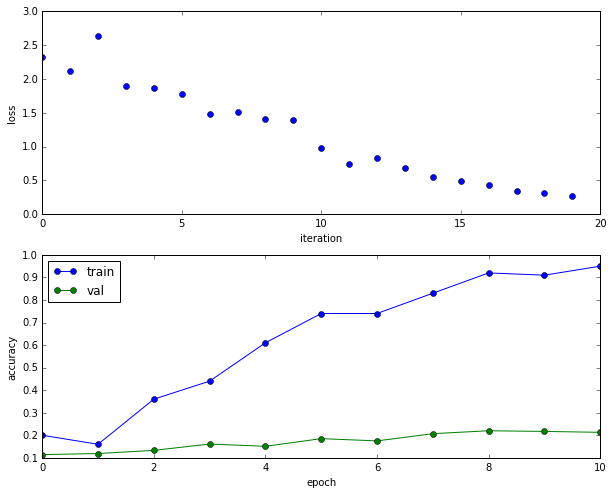

In [26]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Visualize Filters
You can visualize the first-layer convolutional filters from the trained network by running the following:

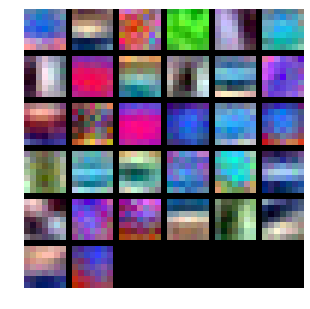

In [28]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(model.params['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

In [11]:
y_test_pred = np.argmax(model.loss(data['X_test']), axis=-1)
acc_test = np.mean(y_test_pred == data['y_test'])
print 'test accuracy: %f' % acc_test

test accuracy: 0.792000
